## Credit Scoring Project

Import the requisite libraries

In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Acquire the data needed from github

- Available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [168]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-12-02 10:11:28--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.5’

CreditScoring.csv.5 100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2021-12-02 10:11:29 (1.20 MB/s) - ‘CreditScoring.csv.5’ saved [182489/182489]



## Reading the data using pandas


In [169]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
seniority,9,17,10,0,0
home,1,1,2,1,1
time,60,60,36,60,36
age,30,58,46,24,26
marital,2,3,2,1,1
records,1,1,2,1,1
job,3,1,3,1,1
expenses,73,48,90,63,46
income,129,131,200,182,107


## Categorical Values Preprocessing
Some of the features are encoded as numbers. The code below decodes the encoded features to have a clear diff between categorical and numerical.

In [170]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

### Prepare the numerical variables:
By replacing missing values encoded with `99999999` by `0`

In [171]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [172]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [173]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Tasks

What are the categorical variables? What are the numerical?

In [174]:
categorical=['home','marital','records','job']

numerical=['seniority','time','age','expenses','income','assets','debt','amount','price']

In [175]:
df.head().T

,0,1,2,3,4
seniority,9,17,10,0,0
home,rent,rent,owner,rent,rent
time,60,60,36,60,36
age,30,58,46,24,26
marital,married,widow,married,single,single
records,no,no,yes,no,no
job,freelance,fixed,freelance,fixed,fixed
expenses,73,48,90,63,46
income,129,131,200,182,107
assets,0,0,3000,2500,0


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [176]:
from sklearn.model_selection import train_test_split
df_full_train, df_test=train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val=train_test_split(df_full_train, test_size=0.25, random_state=1)


df_train.shape, df_val.shape, df_test.shape

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


y_train=df_train.default.values
y_val=df_val.default.values
y_test=df_test.default.values


del df_train['default']
del df_val['default']
del df_test['default']

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable(target variable)

* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [177]:
from sklearn.metrics import roc_auc_score

In [178]:
# lets try plotting the roc curve of these features
from sklearn.metrics import roc_curve

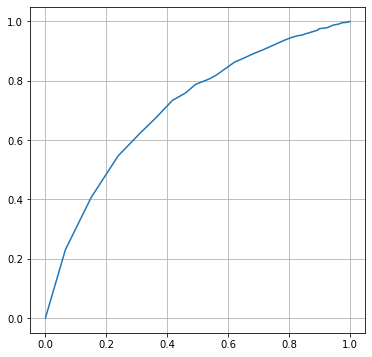

In [179]:
fpr, tpr, _=roc_curve(y_train, -df_train.seniority)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.grid(True)

/home/leviscoffie/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leviscoffie/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seniority', ylabel='Density'>

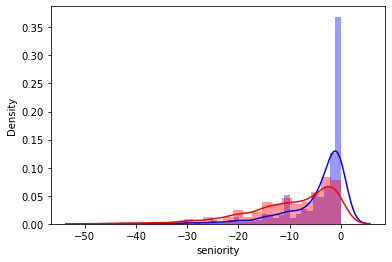

In [180]:
sns.distplot(-df_train.seniority[y_train==1] ,color='blue')
sns.distplot(-df_train.seniority[y_train==0] ,color='red')

In [181]:

for n in numerical:
    
    auc=roc_auc_score(y_train, df_train[n])

    if auc < 0.5:
        auc=roc_auc_score(y_train, -df_train[n])
    print(n, auc)

seniority 0.7093778624491943
time 0.5608662489595051
age 0.5732933272499939
expenses 0.5009184217217011
income 0.682006666132633
assets 0.6486042567122802
debt 0.5047829675783548
amount 0.5910773431595518
price 0.5043329862114843


Which numerical variable (among the following 4) has the highest AUC?

- **seniority**
- time  (has the highest auc)
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [182]:
features=['seniority', 'income', 'assets', 'records', 'job', 'home']
train_dict=df_train[features].to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)

X_train=dv.fit_transform(train_dict)

In [183]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [184]:
val_dict=df_val[features].to_dict(orient='records')
X_val=dv.transform(val_dict)


y_pred=model.predict_proba(X_val)[:,1]

In [185]:
roc_auc_score(y_val, y_pred).round(3)

0.812

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- ### **0.812**

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [203]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores=[]

    thresholds=np.linspace(0,1,101)

    for t in thresholds:

        actual_positive=(y_val==1)
        actual_negative=(y_val==0)

        predict_positive=(y_pred>=t)
        predict_negative=(y_pred<=t)



        tp=(actual_positive & predict_positive).sum()
        tn=(predict_negative & actual_negative).sum()
        
        
        fp=(predict_positive & actual_negative).sum()
        fn=(predict_negative & actual_positive).sum()


        scores.append((t, tp, tn, fp, fn))

    columns=['thresholds','tp','tn','fp','fn']

    df_scores=pd.DataFrame(scores, columns=columns)

    return df_scores





In [204]:
df_scores=confusion_matrix_dataframe(y_val,y_pred)


In [205]:
df_scores['precision']=df_scores.tp/(df_scores.tp +df_scores.fp)
df_scores['recall']=df_scores.tp/(df_scores.tp+df_scores.fn)

df_scores[::10]

,thresholds,tp,tn,fp,fn,precision,recall
0,0.0,246,0,645,0,0.276094,1.000000
10,0.1,235,200,445,11,0.345588,0.955285
20,0.2,215,378,267,31,0.446058,0.873984
30,0.3,187,483,162,59,0.535817,0.760163
40,0.4,140,545,100,106,0.583333,0.569106
50,0.5,114,581,64,132,0.640449,0.463415
60,0.6,78,607,38,168,0.672414,0.317073
70,0.7,37,629,16,209,0.698113,0.150407
80,0.8,21,640,5,225,0.807692,0.085366
90,0.9,6,643,2,240,0.750000,0.024390


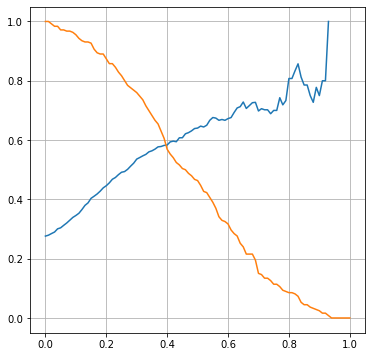

In [206]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.thresholds, df_scores.precision)
plt.plot(df_scores.thresholds, df_scores.recall)

plt.grid(True)

At which threshold precision and recall curves intersect?

* 0.2
* ## 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

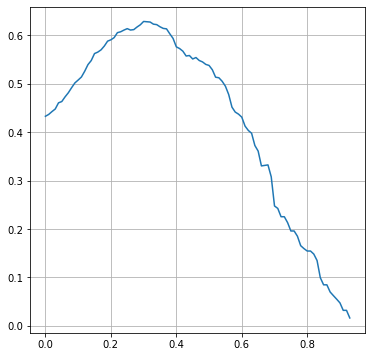

In [209]:
df_scores['f1']=((df_scores.precision *df_scores.recall)/(df_scores.precision+df_scores.recall)) * 2



plt.figure(figsize=(6,6))
plt.plot(df_scores['thresholds'],df_scores['f1'])

plt.grid(True)

In [223]:
df_scores['thresholds'].loc[df_scores['f1'].idxmax()]

0.3

At which threshold F1 is maximal?

- 0.1
- ## 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [224]:
def train(df_train, y_train, C=1.0):

    dicts=df_train[categorical + numerical].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)

    X_train=dv.fit_transform(dicts)

    model=LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model


def predict(df,dv,model):

    dicts=df[categorical+numerical].to_dict(orient='records')

    X=dv.transform(dicts)

    y_pred=model.predict_proba(X)[:,1]


    return y_pred


In [225]:
dv, model=train(df_train,y_train, C=1.0)
y_pred=predict(df_val,dv,model)


roc_auc_score(y_val, y_pred)

0.8488119997479044

In [226]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5, shuffle=True, random_state=1)

#iterate over the different kfolds
scores=[]
for train_idx, val_idx in kfold.split(df_full_train):

    df_train=df_full_train.iloc[train_idx]
    df_val=df_full_train.iloc[val_idx]


    y_train=df_train.default.values
    y_val=df_val.default.values


    dv,model=train(df_train, y_train, C=1.0)
    y_pred=predict(df_val, dv, model)


    auc=roc_auc_score(y_val, y_pred)

    scores.append(auc)
 
print("%.3f, %.3f"%(np.mean(scores),np.std(scores)))

0.845, 0.018


In [227]:
scores

[0.8546480546480547,
 0.8656317660846592,
 0.8304802710243127,
 0.8543312502456472,
 0.8182402966578691]

How large is standard devidation of the scores across different folds?

- 0.001
- ## 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [229]:
kfold=KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    
#iterate over the different values of C
    scores=[]
    for train_idx, val_idx in kfold.split(df_full_train):

        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]


        y_train=df_train.default.values
        y_val=df_val.default.values


        dv,model=train(df_train, y_train, C=C)
        y_pred=predict(df_val, dv, model)


        auc=roc_auc_score(y_val, y_pred)

        scores.append(auc)
 
    print("%s: %.3f, %.3f"%(C, np.mean(scores),np.std(scores)))
    

0.01: 0.835, 0.018
0.1: 0.843, 0.017
1: 0.845, 0.018
10: 0.845, 0.017


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- ## 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C